In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dru-kaggle-intro/sample_submission.csv
/kaggle/input/dru-kaggle-intro/train_mobile.csv
/kaggle/input/dru-kaggle-intro/test_mobile.csv


## Read Dataset

In [2]:
train = pd.read_csv('/kaggle/input/dru-kaggle-intro/train_mobile.csv')
test1 = pd.read_csv('/kaggle/input/dru-kaggle-intro/test_mobile.csv')

## Dataset Overview

In [3]:
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1023,yes,0.6,yes,0,yes,53,0.8,146,3,...,905,1988,2633,17,3.0,8,yes,yes,no,2
1,565,yes,0.6,yes,2,yes,41,1.0,155,5,...,1263,1716,2605,11,2.0,10,yes,yes,no,2
2,617,yes,2.6,no,0,no,10,0.9,141,6,...,1216,1786,2771,16,8.0,12,yes,no,no,2
3,1823,yes,1.3,no,13,yes,44,0.7,151,2,...,1208,1212,1413,8,2.0,16,yes,yes,no,1
4,1823,no,1.8,no,4,yes,10,0.9,149,8,...,381,1018,3222,13,8.0,19,yes,no,yes,3


In [4]:
train.shape

(1500, 21)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1500 non-null   int64  
 1   blue           1500 non-null   object 
 2   clock_speed    1450 non-null   float64
 3   dual_sim       1460 non-null   object 
 4   fc             1500 non-null   int64  
 5   four_g         1455 non-null   object 
 6   int_memory     1500 non-null   int64  
 7   m_dep          1500 non-null   float64
 8   mobile_wt      1500 non-null   int64  
 9   n_cores        1500 non-null   int64  
 10  pc             1500 non-null   int64  
 11  px_height      1500 non-null   int64  
 12  px_width       1500 non-null   int64  
 13  ram            1500 non-null   int64  
 14  sc_h           1500 non-null   int64  
 15  sc_w           1388 non-null   float64
 16  talk_time      1500 non-null   int64  
 17  three_g        1500 non-null   object 
 18  touch_sc

In [6]:
train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,1500.000000,1450.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1388.000000,1500.000000,1500.000000
mean,1238.160000,1.620621,4.324000,32.130000,0.601467,150.330000,4.568667,9.917333,642.916667,1255.106000,2123.830000,12.364667,5.734150,12.036667,1.500000
std,439.103833,0.816908,4.370937,18.077287,0.290150,35.456121,2.308716,6.074902,443.188796,433.117891,1091.421832,4.181787,4.307478,5.483615,1.127319
min,503.000000,0.600000,0.000000,2.000000,0.200000,90.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,3.000000,0.000000
25%,852.750000,0.800000,1.000000,16.000000,0.300000,119.000000,3.000000,5.000000,281.750000,880.500000,1186.750000,9.000000,2.000000,7.000000,0.000000
50%,1221.000000,1.600000,3.000000,32.000000,0.600000,150.000000,5.000000,10.000000,561.500000,1250.500000,2135.500000,12.000000,5.000000,12.000000,1.000000
75%,1608.250000,2.300000,7.000000,48.000000,0.900000,181.000000,7.000000,15.000000,938.000000,1642.250000,3079.250000,16.000000,9.000000,17.000000,3.000000
max,1998.000000,3.100000,19.000000,64.000000,1.100000,210.000000,8.000000,20.000000,1960.000000,1998.000000,4000.000000,19.000000,18.000000,21.000000,3.000000


In [7]:
train.describe(include=object)

,blue,dual_sim,four_g,three_g,touch_screen,wifi
count,1500,1460,1455,1500,1500,1500
unique,2,2,2,2,2,2
top,yes,no,yes,yes,no,yes
freq,751,732,758,1133,754,764


## Data Preparation

In [8]:
test = test1.copy()
test.drop('index', axis=1, inplace=True)

### Outlier Detection

In [9]:
categorical_columns = train.select_dtypes(include='object').columns
numerical_columns = train.select_dtypes(exclude='object').columns
target = 'price_range'

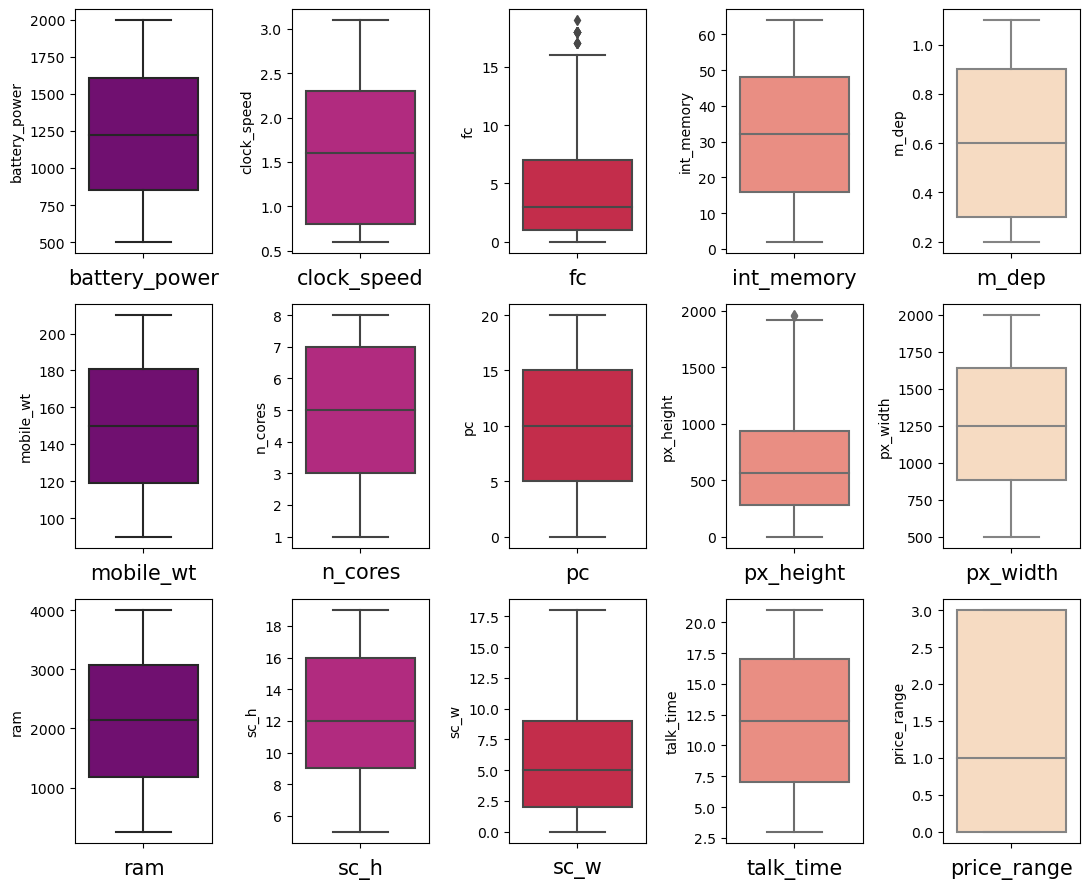

In [10]:
f, ax = plt.subplots(3, 5, figsize=(11, 9), tight_layout=True)

colors = ['purple', 'mediumvioletred', 'crimson', 'salmon', 'peachpuff']

for i, col in enumerate(numerical_columns):
    x = i // 5
    y = i % 5
    sns.boxplot(y=col, data=train, ax=ax[x,y], color=colors[y])
    ax[x,y].set_xlabel(col, fontsize=15)

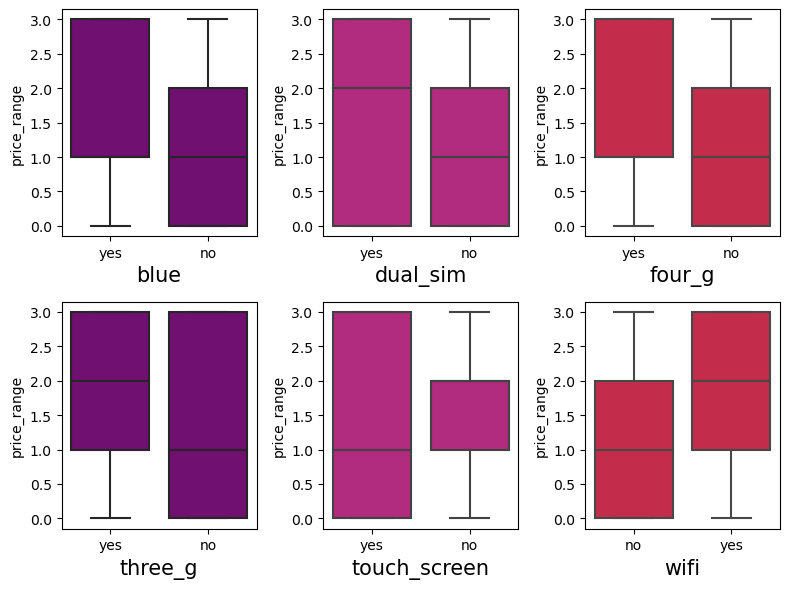

In [11]:
f, ax = plt.subplots(2, 3, figsize=(8, 6), tight_layout=True)

for i, col in enumerate(categorical_columns):
    x = i // 3
    y = i % 3
    sns.boxplot(x=col, y=target, data=train, color=colors[y], ax=ax[x,y])
    ax[x,y].set_xlabel(col, fontsize=15)

In [12]:
q1 = train.quantile(0.25, numeric_only=True)
q3 = train.quantile(0.75, numeric_only=True)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers_ind = []

for i, col in enumerate(numerical_columns):
    outliers = train[(train[col] < lower_bound[i]) | (train[col] > upper_bound[i])]
    outliers_ind.extend(outliers.index.tolist())
    
outliers_ind = list(set(outliers_ind))
print('Number of outliers: ', len(outliers_ind))

Number of outliers:  15


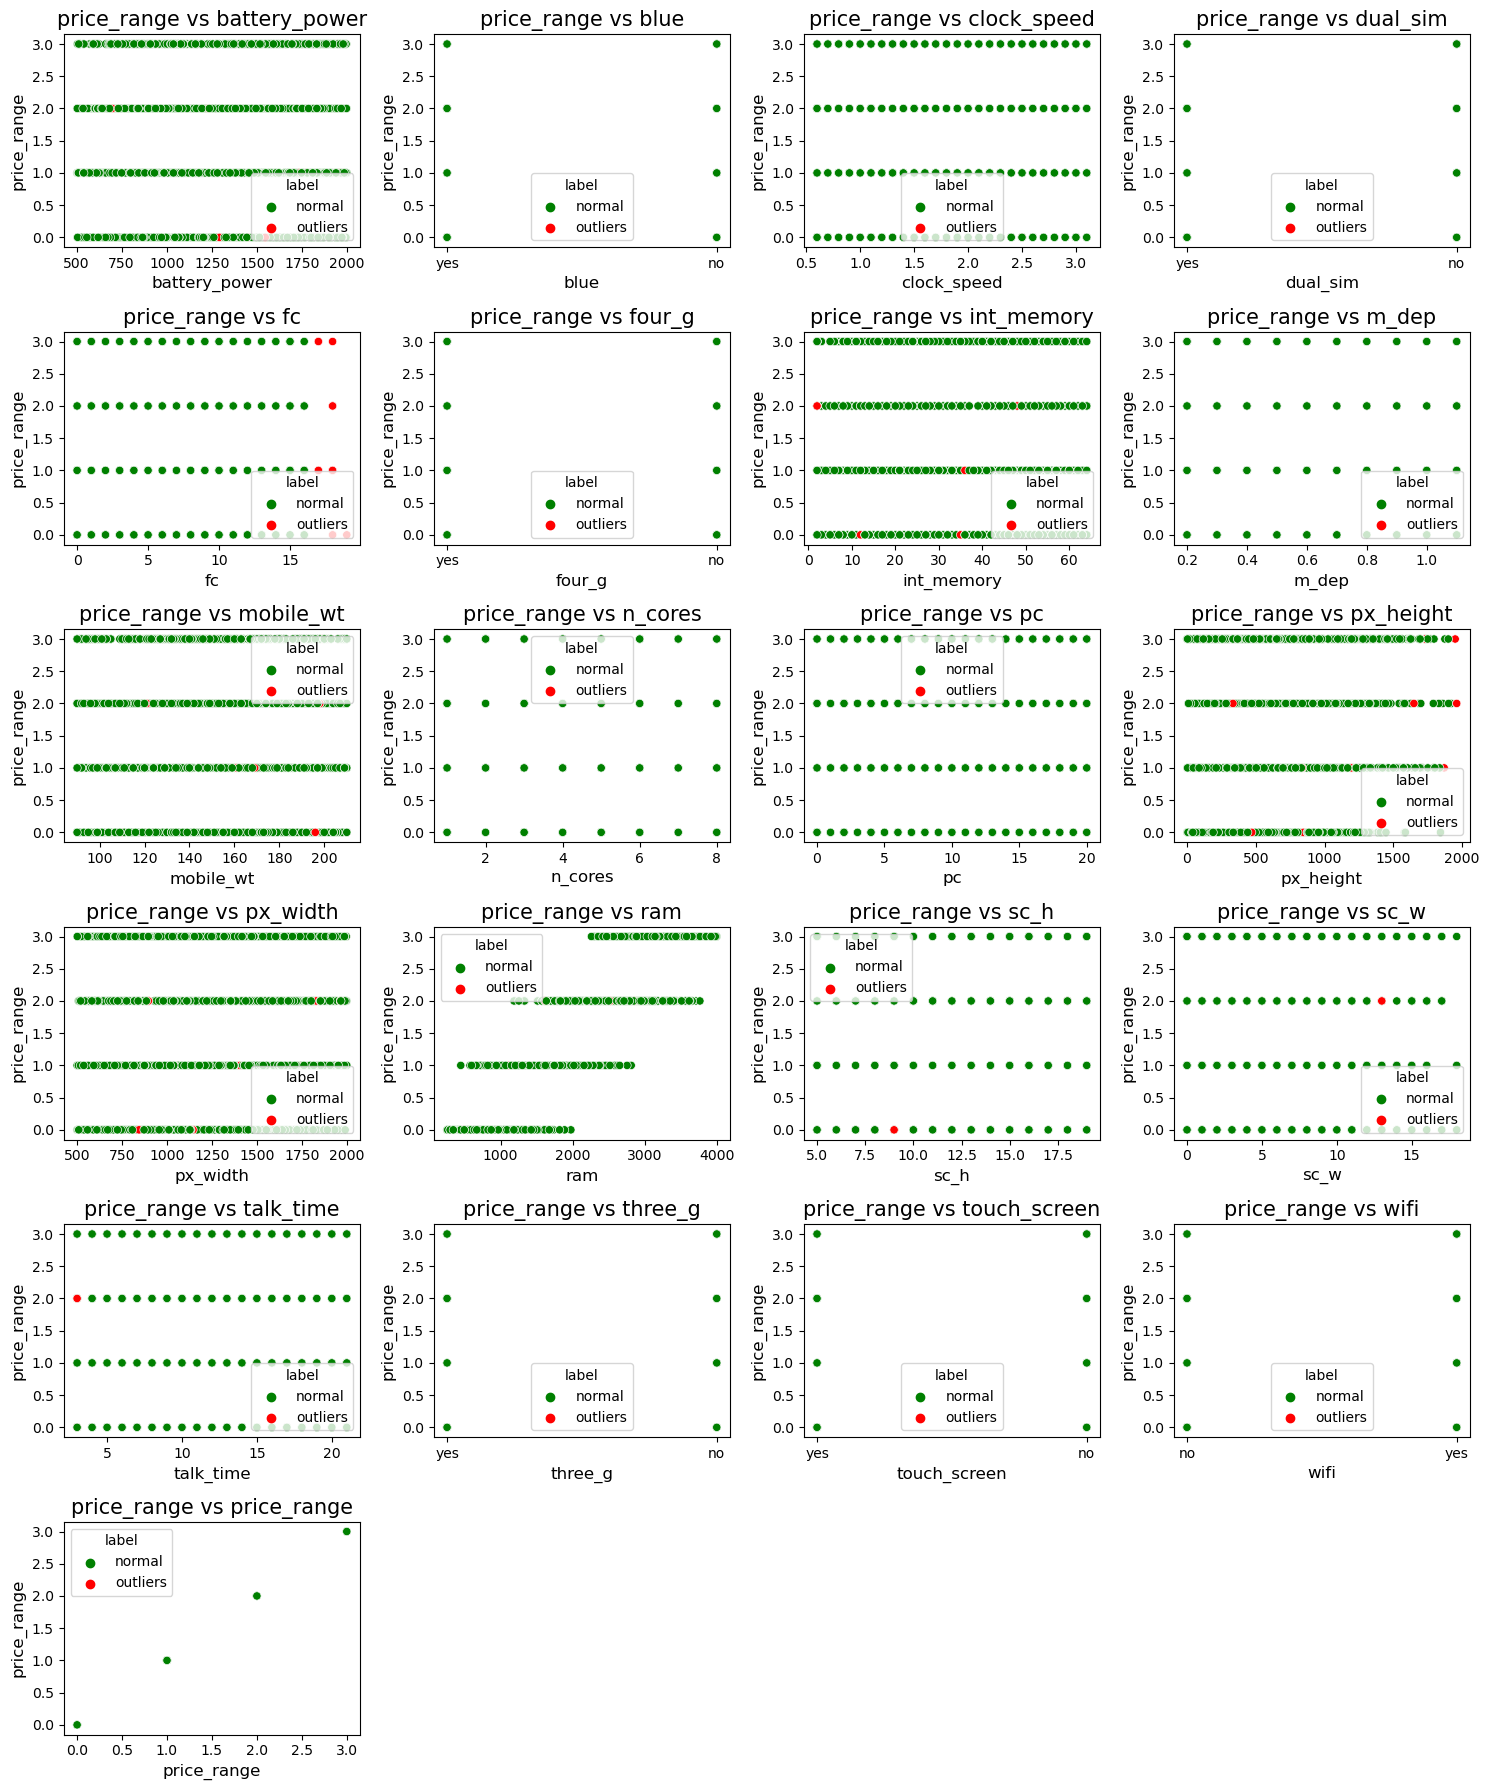

In [13]:
train['label'] = 'normal'
train.loc[outliers_ind, 'label'] = 'outliers'
outliers_colors = ['green', 'red']

f, ax = plt.subplots(6, 4, figsize=(15,18), tight_layout=True)
CustomPalette = sns.set_palette(sns.color_palette(outliers_colors))

for i, col in enumerate(train.columns[:-1]):
    x = i // 4
    y = i % 4
    sns.scatterplot(data=train, x=col, y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title(f'{target} vs {col}', fontsize=15)
    ax[x,y].set_xlabel(col, fontsize=12)
    ax[x,y].set_ylabel(target, fontsize=12)
  
for i in range(1,4):
    ax[5,i].axis('off')

In [14]:
train.drop('label', axis=1, inplace=True)

### Discover Duplicates

In [15]:
train[train.duplicated(keep=False)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


### Discover Missing Values

In [16]:
train.isnull().sum()

battery_power      0
blue               0
clock_speed       50
dual_sim          40
fc                 0
four_g            45
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w             112
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

**Imputing Missing Values**

In [17]:
train['clock_speed'].fillna(train['clock_speed'].mean(), inplace=True)
train['sc_w'].fillna(train['sc_w'].mean(), inplace=True)

train['four_g'].fillna(train['four_g'].mode()[0], inplace=True)
train['dual_sim'].fillna(train['dual_sim'].mode()[0], inplace=True)

In [18]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

## Categorical Variables Encoding

In [19]:
train = pd.get_dummies(train, columns=categorical_columns, drop_first=True)
test = pd.get_dummies(test, columns=categorical_columns, drop_first=True)
train.head(5)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,price_range,blue_yes,dual_sim_yes,four_g_yes,three_g_yes,touch_screen_yes,wifi_yes
0,1023,0.6,0,53,0.8,146,3,6,905,1988,...,17,3.0,8,2,1,1,1,1,1,0
1,565,0.6,2,41,1.0,155,5,6,1263,1716,...,11,2.0,10,2,1,1,1,1,1,0
2,617,2.6,0,10,0.9,141,6,9,1216,1786,...,16,8.0,12,2,1,0,0,1,0,0
3,1823,1.3,13,44,0.7,151,2,14,1208,1212,...,8,2.0,16,1,1,0,1,1,1,0
4,1823,1.8,4,10,0.9,149,8,10,381,1018,...,13,8.0,19,3,0,0,1,1,0,1


## Correlation Analysis

<Axes: >

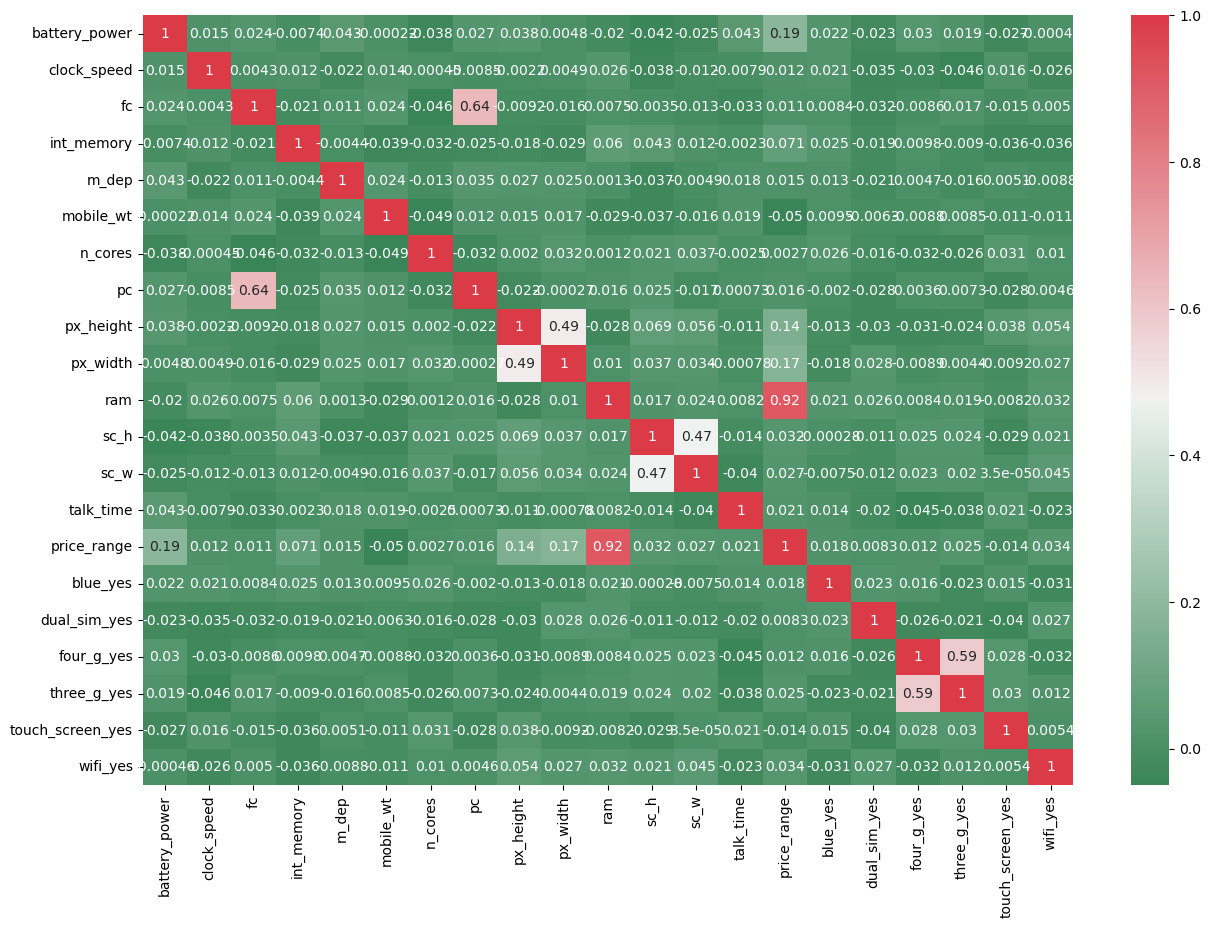

In [20]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(train.corr(), annot=True, cmap=cmap)

## Standardization and Dataset Splitting

In [21]:
X = train.drop('price_range', axis=1)
y = train['price_range']

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

## Evaluation using Cross Validation

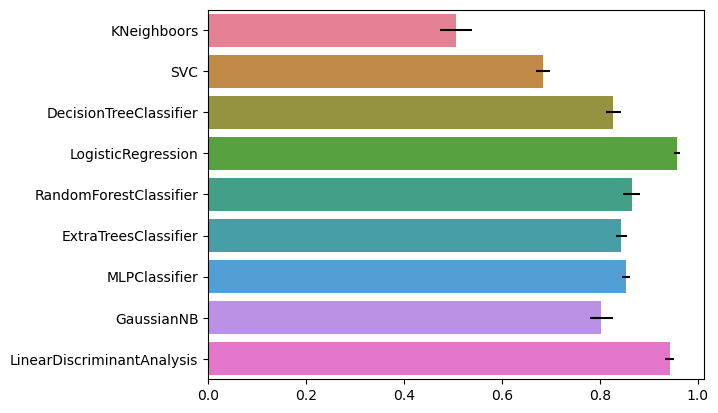

In [24]:
random_state = 2
Kfold = StratifiedKFold(n_splits=6)
alphas = 10**np.linspace(10,-2,100)*0.5

pipelines = [make_pipeline(StandardScaler(), KNeighborsClassifier()), 
             make_pipeline(StandardScaler(), OneVsRestClassifier(SVC(random_state=random_state))),
             make_pipeline(DecisionTreeClassifier(random_state=random_state)),
             make_pipeline(StandardScaler(), LogisticRegression(random_state = random_state, multi_class='multinomial')),
             make_pipeline(RandomForestClassifier(random_state=random_state)),
             make_pipeline(ExtraTreesClassifier(random_state=random_state)),
             make_pipeline(StandardScaler(), MLPClassifier(random_state=random_state, learning_rate_init=0.005, alpha=1e-3, tol=1e-1, early_stopping=True)),
             make_pipeline(StandardScaler(), GaussianNB()),
             make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())]

cv_results = []
cv_mean = []
cv_std = []

for pipeline in pipelines:
    cv_results.append(cross_val_score(pipeline, X, y, scoring='accuracy', cv=Kfold, n_jobs=4))
    
for result in cv_results:
    cv_mean.append(result.mean())
    cv_std.append(result.std())
    
model_names = ['KNeighboors', 'SVC', 'DecisionTreeClassifier', 
               'LogisticRegression', 'RandomForestClassifier', 
               'ExtraTreesClassifier', 'MLPClassifier', 'GaussianNB', 'LinearDiscriminantAnalysis']     
cv_plot = sns.barplot(x=cv_mean, y=model_names, palette='husl', orient='h', **{'xerr':cv_std})

In [25]:
pd.DataFrame({'Accuracy': cv_mean}, index=model_names)

,Accuracy
KNeighboors,0.506667
SVC,0.684000
DecisionTreeClassifier,0.828000
LogisticRegression,0.958000
RandomForestClassifier,0.865333
ExtraTreesClassifier,0.844000
MLPClassifier,0.854000
GaussianNB,0.803333
LinearDiscriminantAnalysis,0.942667


**The models that were selected for further investigation are:** Support Vector Classifier, Logistic Regression, Random Forest,and Linear Discriminant Analysis.

## Hyperparameter Tuning

### Hyperparameter tuning on Support Vector Classifier

In [26]:
svc = SVC()

parameters = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf']}

gs_svc = GridSearchCV(svc, param_grid=parameters, cv=Kfold,
                      scoring='accuracy', n_jobs=-1, verbose=1)

gs_svc.fit(X_train, y_train)

Fitting 6 folds for each of 32 candidates, totalling 192 fits


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [27]:
svc_best = gs_svc.best_estimator_
svc_best_score = gs_svc.best_score_

print('Best parameters for SVC:', svc_best)
print('Best score:', svc_best_score)

Best parameters for SVC: SVC(C=100, gamma=1, kernel='linear')
Best score: 0.9575


**Support Vector Classifier Evaluation**

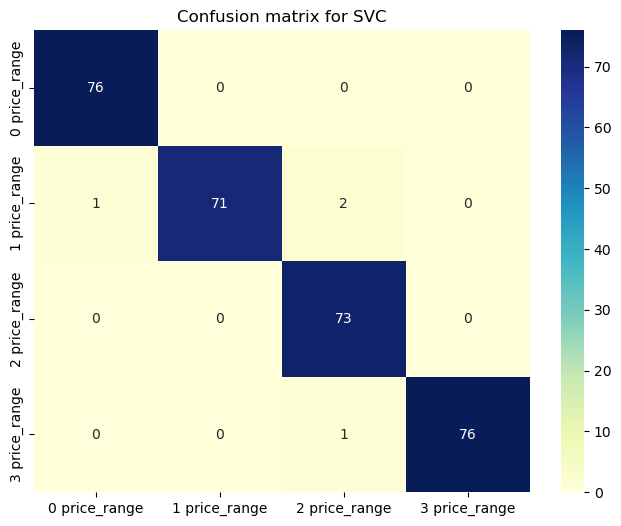

In [28]:
svc = SVC(C=100, gamma=1, kernel='linear')

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_val)

cm = confusion_matrix(y_val, y_pred_svc)
conf_matrix=pd.DataFrame(data = cm, 
                         columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion matrix for SVC")
plt.show()

### Hyperparameter tuning on Logistic Regression

In [29]:
lg = LogisticRegression(multi_class='multinomial')

parameters = {'C':np.linspace(0.1, 1.0, 5),
              'solver':['sag', 'newton-cg']}

gs_lg = GridSearchCV(lg, param_grid=parameters, cv=Kfold,
                      scoring='accuracy', n_jobs=-1, verbose=1)

gs_lg.fit(X_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             estimator=LogisticRegression(multi_class='multinomial'), n_jobs=-1,
             param_grid={'C': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                         'solver': ['sag', 'newton-cg']},
             scoring='accuracy', verbose=1)

In [30]:
lg_best = gs_lg.best_estimator_
lg_best_score = gs_lg.best_score_

print('Best parameters for Logistic Regression:', lg_best)
print('Best score:', lg_best_score)

Best parameters for Logistic Regression: LogisticRegression(multi_class='multinomial', solver='sag')
Best score: 0.9458333333333334


**Logistic Regression Evaluation**

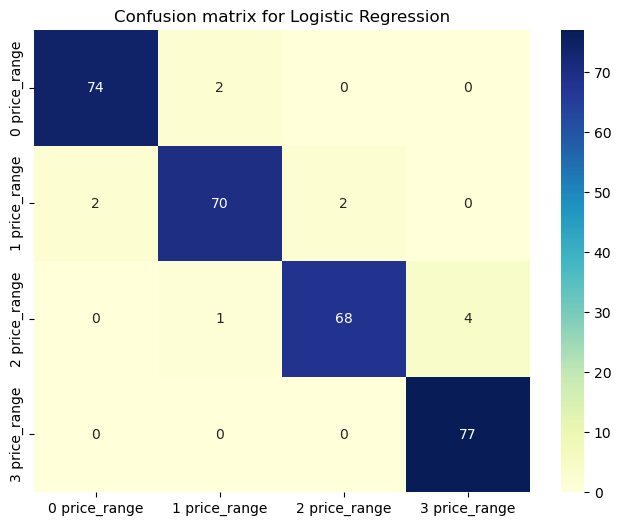

In [31]:
lg = LogisticRegression(multi_class='multinomial', solver='sag')

lg.fit(X_train,y_train)

y_pred_lg = lg.predict(X_val)

cm = confusion_matrix(y_val, y_pred_lg)
conf_matrix=pd.DataFrame(data = cm, 
                         columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion matrix for Logistic Regression")
plt.show()

### Hyperparameter tuning on Random Forest Classifie

In [32]:
rf = RandomForestClassifier()

parameters = {'max_depth': [10, 30, 50, 70, 100],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 200, 400]}

gs_rf = GridSearchCV(rf, param_grid=parameters, cv=Kfold,
                      scoring='accuracy', n_jobs=-1, verbose=1)

gs_rf.fit(X_train, y_train)

Fitting 6 folds for each of 135 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50, 70, 100],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy', verbose=1)

In [33]:
rf_best = gs_rf.best_estimator_
rf_best_score = gs_rf.best_score_

print('Best parameters for Random Forest:', rf_best)
print('Best score:', rf_best_score)

Best parameters for Random Forest: RandomForestClassifier(max_depth=10, min_samples_split=5)
Best score: 0.8666666666666667


**Random Forest Classifier Evaluation**

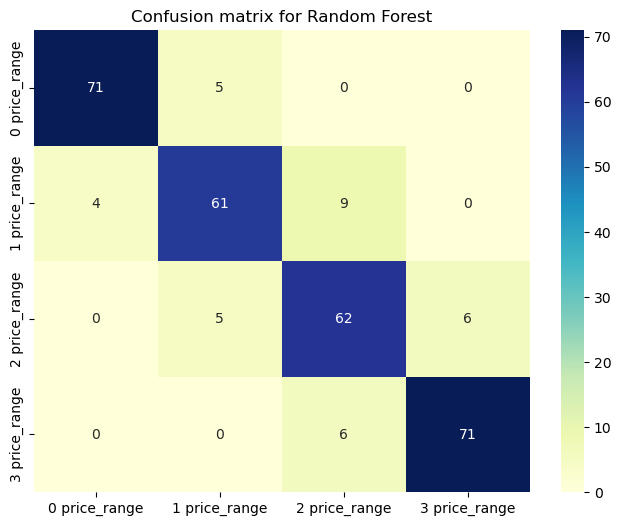

In [34]:
rf = RandomForestClassifier(max_depth=32, max_features=0.3, min_samples_leaf=5, min_samples_split=10)

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_val)

cm = confusion_matrix(y_val, y_pred_rf)
conf_matrix=pd.DataFrame(data = cm, 
                         columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion matrix for Random Forest")
plt.show()

### Hyperparameter tuning on Linear Discriminant Analysis

In [35]:
lda = LinearDiscriminantAnalysis()

parameters = {'solver': ['svd', 'lsqr', 'eigen']}

gs_lda = GridSearchCV(lda, param_grid=parameters, cv=Kfold,
                      scoring='accuracy', n_jobs=-1, verbose=1)

gs_lda.fit(X_train, y_train)

Fitting 6 folds for each of 3 candidates, totalling 18 fits


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy', verbose=1)

In [36]:
lda_best = gs_lda.best_estimator_
lda_best_score = gs_lda.best_score_

print('Best parameters for Linear Discriminant Analysis:', lda_best)
print('Best score:', lda_best_score)

Best parameters for Linear Discriminant Analysis: LinearDiscriminantAnalysis()
Best score: 0.9425


**Linear Discriminant Analysis Evaluation**

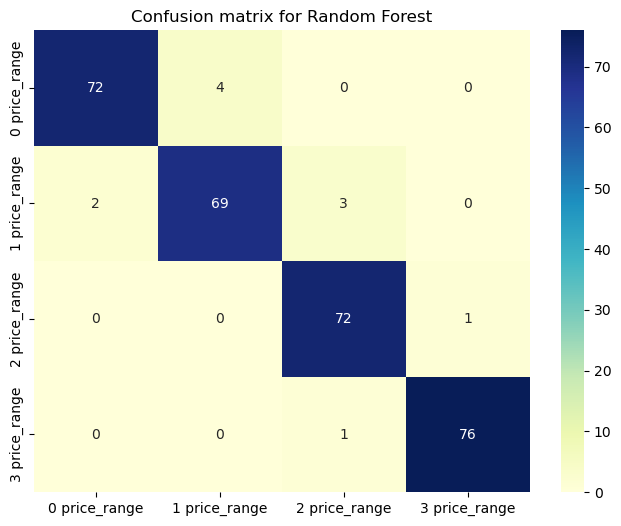

In [37]:
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_val)

cm = confusion_matrix(y_val, y_pred_lda)
conf_matrix=pd.DataFrame(data = cm, 
                         columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion matrix for Random Forest")
plt.show()

## Final Model

In [38]:
predicted_price_range = svc.predict(test_scaled)
predicted_price_range

array([1, 3, 3, 1, 3, 3, 1, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 2, 1, 1, 1,
       0, 3, 2, 2, 3, 2, 2, 1, 0, 1, 0, 1, 2, 3, 1, 2, 1, 1, 2, 3, 2, 1,
       1, 0, 0, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 0, 2, 3, 1, 0, 2, 1, 2, 2,
       0, 2, 3, 1, 3, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 3, 2, 2, 1, 2, 0,
       0, 2, 2, 2, 1, 2, 3, 1, 0, 1, 0, 3, 2, 1, 3, 3, 2, 1, 3, 2, 3, 3,
       2, 2, 3, 2, 3, 3, 3, 0, 1, 3, 2, 2, 3, 0, 1, 1, 3, 2, 2, 1, 3, 0,
       3, 1, 0, 2, 2, 3, 1, 3, 2, 1, 3, 1, 3, 2, 2, 0, 0, 1, 1, 3, 2, 0,
       3, 3, 3, 0, 0, 0, 2, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 3, 3, 0, 1, 1, 2, 2, 1, 2, 3, 0, 3, 1, 2,
       3, 1, 1, 1, 0, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 1, 0, 0, 0, 2, 1,
       0, 1, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 3, 2, 1, 2, 2, 2, 1, 0, 0, 2,
       3, 2, 2, 2, 1, 3, 3, 3, 0, 1, 2, 2, 0, 2, 3, 0, 3, 0, 3, 0, 2, 0,
       2, 2, 2, 1, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 1,
       1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 1, 1,

In [39]:
submission = pd.DataFrame({'index': test1['index'],
                           'price_range': predicted_price_range})
submission.to_csv('submission.csv', index=False)